In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import torch
import json

In [22]:
root_results_dir = Path("/homes/ar2342/one_more_dir/contextual_frogs/experimental/optim/results/recoverysweep101a")
#collect all the result subdirs into a list
result_dirs = [list(root_results_dir.glob("*"))]
result_dirs = [item for sublist in result_dirs for item in sublist]  #

In [23]:
result_dirs

[PosixPath('/homes/ar2342/one_more_dir/contextual_frogs/experimental/optim/results/recoverysweep101a/run8'),
 PosixPath('/homes/ar2342/one_more_dir/contextual_frogs/experimental/optim/results/recoverysweep101a/run2'),
 PosixPath('/homes/ar2342/one_more_dir/contextual_frogs/experimental/optim/results/recoverysweep101a/run16'),
 PosixPath('/homes/ar2342/one_more_dir/contextual_frogs/experimental/optim/results/recoverysweep101a/run14'),
 PosixPath('/homes/ar2342/one_more_dir/contextual_frogs/experimental/optim/results/recoverysweep101a/run7'),
 PosixPath('/homes/ar2342/one_more_dir/contextual_frogs/experimental/optim/results/recoverysweep101a/run5'),
 PosixPath('/homes/ar2342/one_more_dir/contextual_frogs/experimental/optim/results/recoverysweep101a/run11'),
 PosixPath('/homes/ar2342/one_more_dir/contextual_frogs/experimental/optim/results/recoverysweep101a/run3'),
 PosixPath('/homes/ar2342/one_more_dir/contextual_frogs/experimental/optim/results/recoverysweep101a/run1'),
 PosixPath('/hom

In [24]:
# result_dirs = ['/homes/ar2342/one_more_dir/contextual_frogs/experimental/optim/results/tempBanana2']

Reading results from /homes/ar2342/one_more_dir/contextual_frogs/experimental/optim/results/recoverysweep101a/run8
Reading results from /homes/ar2342/one_more_dir/contextual_frogs/experimental/optim/results/recoverysweep101a/run2
Reading results from /homes/ar2342/one_more_dir/contextual_frogs/experimental/optim/results/recoverysweep101a/run16
Reading results from /homes/ar2342/one_more_dir/contextual_frogs/experimental/optim/results/recoverysweep101a/run14
Reading results from /homes/ar2342/one_more_dir/contextual_frogs/experimental/optim/results/recoverysweep101a/run7
Reading results from /homes/ar2342/one_more_dir/contextual_frogs/experimental/optim/results/recoverysweep101a/run5


Reading results from /homes/ar2342/one_more_dir/contextual_frogs/experimental/optim/results/recoverysweep101a/run11
Reading results from /homes/ar2342/one_more_dir/contextual_frogs/experimental/optim/results/recoverysweep101a/run3
Reading results from /homes/ar2342/one_more_dir/contextual_frogs/experimental/optim/results/recoverysweep101a/run1
Reading results from /homes/ar2342/one_more_dir/contextual_frogs/experimental/optim/results/recoverysweep101a/run10
Reading results from /homes/ar2342/one_more_dir/contextual_frogs/experimental/optim/results/recoverysweep101a/run12
Reading results from /homes/ar2342/one_more_dir/contextual_frogs/experimental/optim/results/recoverysweep101a/run15
Reading results from /homes/ar2342/one_more_dir/contextual_frogs/experimental/optim/results/recoverysweep101a/run4
Reading results from /homes/ar2342/one_more_dir/contextual_frogs/experimental/optim/results/recoverysweep101a/run9
Reading results from /homes/ar2342/one_more_dir/contextual_frogs/experimenta

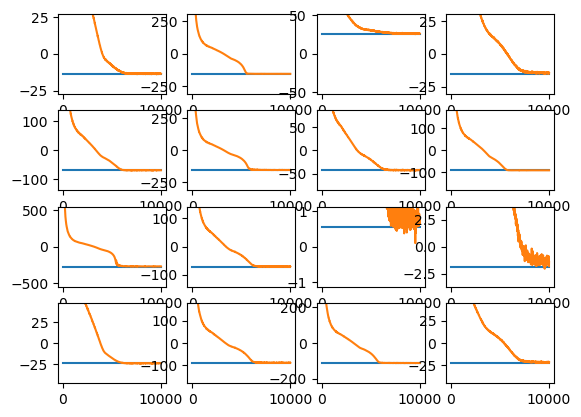

In [25]:
ref_vs_opts = []
params_to_params = []
for ii, result_dir in enumerate(result_dirs):
    plt.subplot(4, 4, ii+1)
    print(f"Reading results from {result_dir}")
    loss_df = pd.read_csv(f"{result_dir}/loss.csv", names=['iteration', 'loss'])
    log_df = pd.read_csv(f"{result_dir}/log.csv", names=['iteration', 'loss', 'log_likelihood', 'kl_divergence'])
    reference_density = np.genfromtxt(f"{result_dir}/toysynth_density.txt")
    #load params.pt
    opt_params = torch.load(f"{result_dir}/params.pt")
    with open(f"{result_dir}/config.json", 'r') as f:
        config = json.load(f)
    
    # print("Loss DataFrame:")
    # print(loss_df.head())
    
    # print("\nLog DataFrame:")
    # print(log_df.head())
    
    # # Example analysis: Calculate mean loss and log likelihood
    # mean_loss = loss_df['loss'].mean()
    # mean_log_likelihood = log_df['log_likelihood'].mean()
    
    # print(f"\nMean Loss: {mean_loss}")
    # print(f"Mean Log Likelihood: {mean_log_likelihood}")
    plt.plot(loss_df['iteration'], -np.ones_like(loss_df['iteration'])*reference_density, label='Log Likelihood')
    plt.plot(loss_df['iteration'], loss_df['loss'], label='Loss')
    ref_vs_opts.append((reference_density, -loss_df['loss'].min()))
    plt.ylim(-2.*np.abs(reference_density), 2.*np.abs(reference_density))
    opt_params_numpy = {k: v.cpu().numpy() for k, v in opt_params.items()}
    opt_params = (opt_params_numpy['gen.sigma_a'], opt_params_numpy['gen.sigma_x'])
    conf_params = (config['toymodel_OUsigma_obs'], config['toymodel_OUsigma_process'])
    params_to_params.append((opt_params, conf_params))





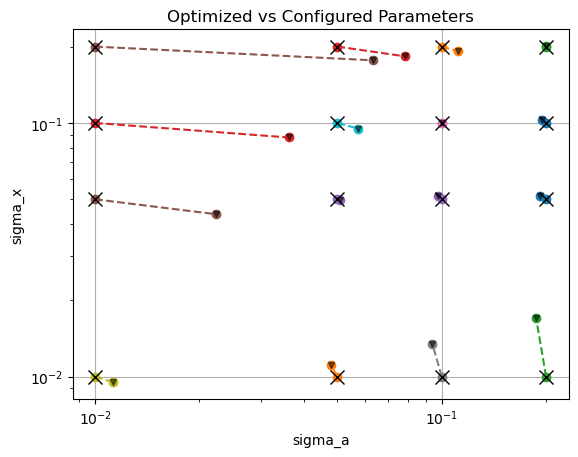

In [34]:
#plot lines from opt to conf params
for (opt_a, opt_x), (conf_a, conf_x) in params_to_params:
    # plt.figure()
    plt.plot([conf_a, opt_a], [conf_x, opt_x], '--',marker='o')
    plt.plot(conf_a, conf_x ,marker='x',markersize=10, color='black')
    plt.plot(opt_a, opt_x ,marker='v',markersize=5, color='black', alpha=0.5)
    plt.xscale('log')
    plt.yscale('log')
    plt.title('Optimized vs Configured Parameters')
    plt.xlabel('sigma_a')
    plt.ylabel('sigma_x')
plt.grid(True)
plt.show()

In [ ]:
opt_params_numpy = {k: v.cpu().numpy() for k, v in opt_params.items()}

In [ ]:
opt_params_numpy['gen.sigma_a'], opt_params_numpy['gen.sigma_x']



(array([0.09771755], dtype=float32), array([0.05134301], dtype=float32))

In [ ]:
config

{'out_dir': 'results/tempBanana2/',
 'data': '/homes/ar2342/scratch/sasha-model-optimization/_data_er5/test',
 'model': 'toy',
 'klmethod': 'analytical',
 'reuse': None,
 'cuda_index': 1,
 'bs': 512,
 'n': 128,
 't_episode': 100,
 'max_iter': 10000,
 'enable_kl_grad': True,
 'print_params': False,
 'save_matrices_every': 1000,
 'toydata_OUphi': 0.9,
 'toydata_OUsigma_process': 0.05,
 'toydata_OUsigma_obs': 0.1,
 'toymodel_OUphi': 0.9,
 'toymodel_OUsigma_process': 0.05,
 'toymodel_OUsigma_obs': 0.1,
 'optimize_toy_noises': True}